In [64]:
import numpy as np
from math import e,pi
from functools import lru_cache, wraps
from copy import  copy
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)


import matplotlib.pyplot as plt


In [65]:
@lru_cache()
def sig1(n):
    return e**(-2j*pi/n)


In [66]:
@lru_cache()
def sigjk(jk,n):
    return sig1(n)**jk

In [67]:
@lru_cache()
def dft_matix(n):
    F= np.matrix(np.zeros((n,n)),dtype=np.complex)
    for j in range(0,n):
        for k in range(0,n):
            F[j,k] = sigjk(j*k,n)
    return F

In [68]:
# DFT

In [69]:
dft_matix(3)

matrix([[ 1.0+0.j       ,  1.0+0.j       ,  1.0+0.j       ],
        [ 1.0+0.j       , -0.5-0.8660254j, -0.5+0.8660254j],
        [ 1.0+0.j       , -0.5+0.8660254j, -0.5-0.8660254j]])

In [70]:
np.fft.fft(np.eye(3))

array([[ 1.0+0.j       ,  1.0+0.j       ,  1.0+0.j       ],
       [ 1.0+0.j       , -0.5-0.8660254j, -0.5+0.8660254j],
       [ 1.0+0.j       , -0.5+0.8660254j, -0.5-0.8660254j]])

In [71]:
def dft(x):
    F= dft_matix(x.size)
    return F.dot(x)

In [72]:
def idft(y):
    n= y.size
    y_conj=  np.conj(y)
    Fy_conj = dft_matix(n).dot(y_conj.transpose())
    return 1/n * np.conj(Fy_conj)

In [73]:
x =np.array( [1,2,2,3,1,2,2,3,1,2,3])
x1= idft(dft(x))

In [74]:
np.hstack((np.real(x1),np.matrix(x).T))

matrix([[ 1.,  1.],
        [ 2.,  2.],
        [ 2.,  2.],
        [ 3.,  3.],
        [ 1.,  1.],
        [ 2.,  2.],
        [ 2.,  2.],
        [ 3.,  3.],
        [ 1.,  1.],
        [ 2.,  2.],
        [ 3.,  3.]])

# fft

In [75]:
@lru_cache()
def D_n_half(n):
    res = np.zeros((int(n/2),int(n/2)),dtype = np.complex)
    for i in range(int(n/2)):
        res[i,i] = sigjk(i,n)
    return res
    

In [76]:
def fft(x):
    n= x.shape[0]
    if n %2 != 0:
        raise ValueError()
        
    if n  == 2 :
        return np.hstack((x[0]+x[1],x[0]-x[1]))
    
    even_ind= np.arange(int(n/2),dtype=int)*2
    odd_ind = even_ind+1
    
    x0=copy(x[even_ind])
    x1=copy(x[odd_ind])
    x1=x[1::2]
    x0=x[0::2]
    
    
    fft_ev= fft(x0)
    D_fft_odd=fft(x1).dot(D_n_half(n))
    
    return np.hstack((fft_ev+D_fft_odd,fft_ev-D_fft_odd))

In [77]:
x= [1,2]*4
x=np.array(copy(x))

In [78]:
fft(x) - np.fft.fft(x)

array([ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j])

In [79]:
np.fft.fft(x)

array([ 12.+0.j,   0.+0.j,   0.+0.j,   0.+0.j,  -4.+0.j,   0.+0.j,
         0.+0.j,   0.+0.j])

# DFT 1D

In [80]:

def plotly_plot(sums, name="Generic", title="Generic", xlabel="Generic", ylabel="Generic"):
    trace1 = go.Scatter(
        x=[i for i in range(1, len(sums))],
        y=sums,
        name=name,
        mode='lines+markers',
    )

    data = [trace1]
    layout = go.Layout(
        barmode='stack',
        title=title,
        width=1000,
        height=600,
        paper_bgcolor='rgb(243, 243, 243)',
        plot_bgcolor='rgb(243, 243, 243)',
        yaxis=dict(title=xlabel),
        xaxis=dict(title=ylabel)
    )

    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)


In [162]:
def composed_signal(freq_list,length =400,range_split=False):
    res = np.zeros((1,length))
    if range_split:
        n = len(freq_list)        
        step = int(length/n)
        borders = [step*i  for i in range(n+1)]
        borders[n] = length
        ranges = ((borders[i],borders[i+1]) for i in range(n))
        for freq,rng in zip(freq_list,ranges):
            s =np.sin(np.arange(0,length)*freq)[rng[0]:rng[1]]
            res[:,rng[0]:rng[1]]+=  s
    else:
        for freq in freq_list:
            res = res + np.sin(np.arange(0,length)*freq)
    return (res*1e5)[0]

In [171]:
def compute_and_plot(signal,imaginary=False,absolute = True):
    y = np.fft.fft(signal)
    
    y = np.imag(y) if imaginary else np.real(y)
    if absolute:
        y = np.abs(y)
    
    x_= list(range(len(y)))
    plt.title("Imaginary" if imaginary else "Real")
    plt.plot(x_,y.tolist())
    plt.show()

# 5 Signals

In [173]:
x = composed_signal([0.1,0.2,0.3,0.4,0.5])

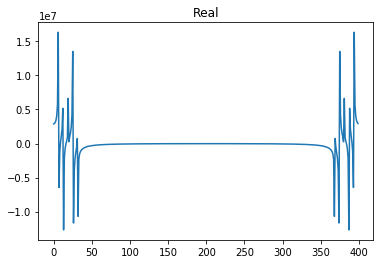

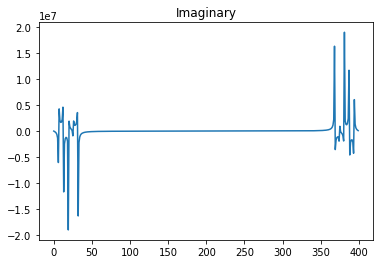

In [174]:
plotly_plot(x)
compute_and_plot(x,imaginary=False,absolute=False)
compute_and_plot(x,imaginary=True,absolute=False)

## Spirals? interesting

https://dsp.stackexchange.com/questions/431/what-is-the-physical-significance-of-negative-frequencies

# 5 Signals with range split

In [177]:
x = composed_signal([0.1,0.2,0.3,0.4,0.5],range_split=True)

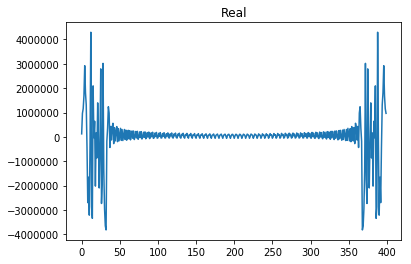

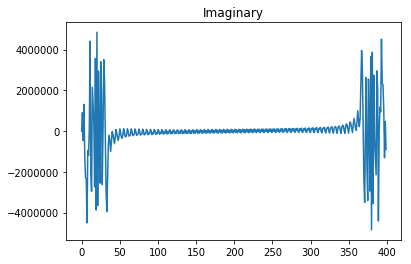

In [178]:
plotly_plot(x)
compute_and_plot(x,imaginary=False,absolute=False)
compute_and_plot(x,imaginary=True,absolute=False)